In [4]:
#from MLFeatures import *

#fl = FeatureConfig()

In [5]:
import pandas as pd
from prophet import Prophet

df = pd.read_csv("dataset.csv")

# some munging
df["Year"] = df["Time Date"].apply(lambda x: str(x)[-4:])
df["Month"] = df["Time Date"].apply(lambda x: str(x)[-6:-4])
df["Day"] = df["Time Date"].apply(lambda x: str(x)[:-6])
df["ds"] = pd.DatetimeIndex(df["Year"] + "-" + df["Month"] + "-" + df["Day"])
df = df.loc[(df["Product"] == 2667437) & (df["Store"] == "QLD_CW_ST0203")]
df.drop(["Time Date", "Product", "Store", "Year", "Month", "Day"], axis=1, inplace=True)
df.columns = ["y", "ds"]
df.head()


m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

future = m.make_future_dataframe(periods=100, freq="D")
forecast = m.predict(future)
forecast.tail()




18:56:52 - cmdstanpy - INFO - Chain [1] start processing
18:56:52 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4234.743516,2210.593072,5344.716740,4231.454392,4237.947435,-512.713964,-512.713964,-512.713964,470.082207,...,16.621912,16.621912,16.621912,-999.418082,-999.418082,-999.418082,0.0,0.0,0.0,3722.029552
1176,2021-03-23,4235.813766,2112.207872,5127.805203,4232.483904,4239.066453,-530.167812,-530.167812,-530.167812,470.082207,...,-11.280458,-11.280458,-11.280458,-988.969561,-988.969561,-988.969561,0.0,0.0,0.0,3705.645954
1177,2021-03-24,4236.884016,2171.784662,5298.028746,4233.513417,4240.185471,-515.624480,-515.624480,-515.624480,470.082207,...,-4.407976,-4.407976,-4.407976,-981.298711,-981.298711,-981.298711,0.0,0.0,0.0,3721.259536
1178,2021-03-25,4237.954267,2182.316181,5384.146335,4234.542929,4241.304489,-484.426021,-484.426021,-484.426021,470.082207,...,22.480428,22.480428,22.480428,-976.988656,-976.988656,-976.988656,0.0,0.0,0.0,3753.528246
1179,2021-03-26,4239.024517,2062.729677,5231.469353,4235.572442,4242.423507,-541.034143,-541.034143,-541.034143,470.082207,...,-34.578778,-34.578778,-34.578778,-976.537572,-976.537572,-976.537572,0.0,0.0,0.0,3697.990374


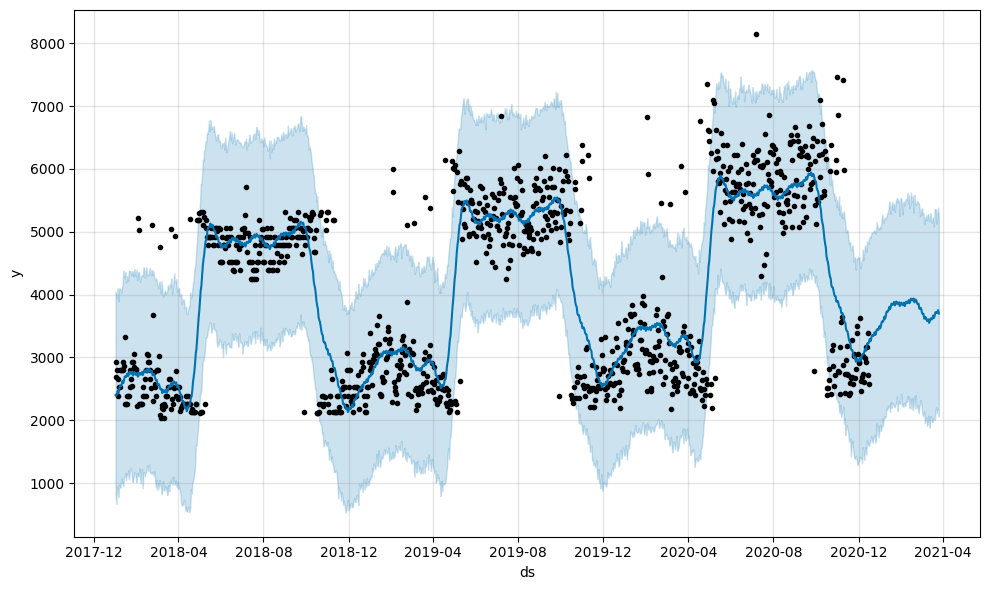

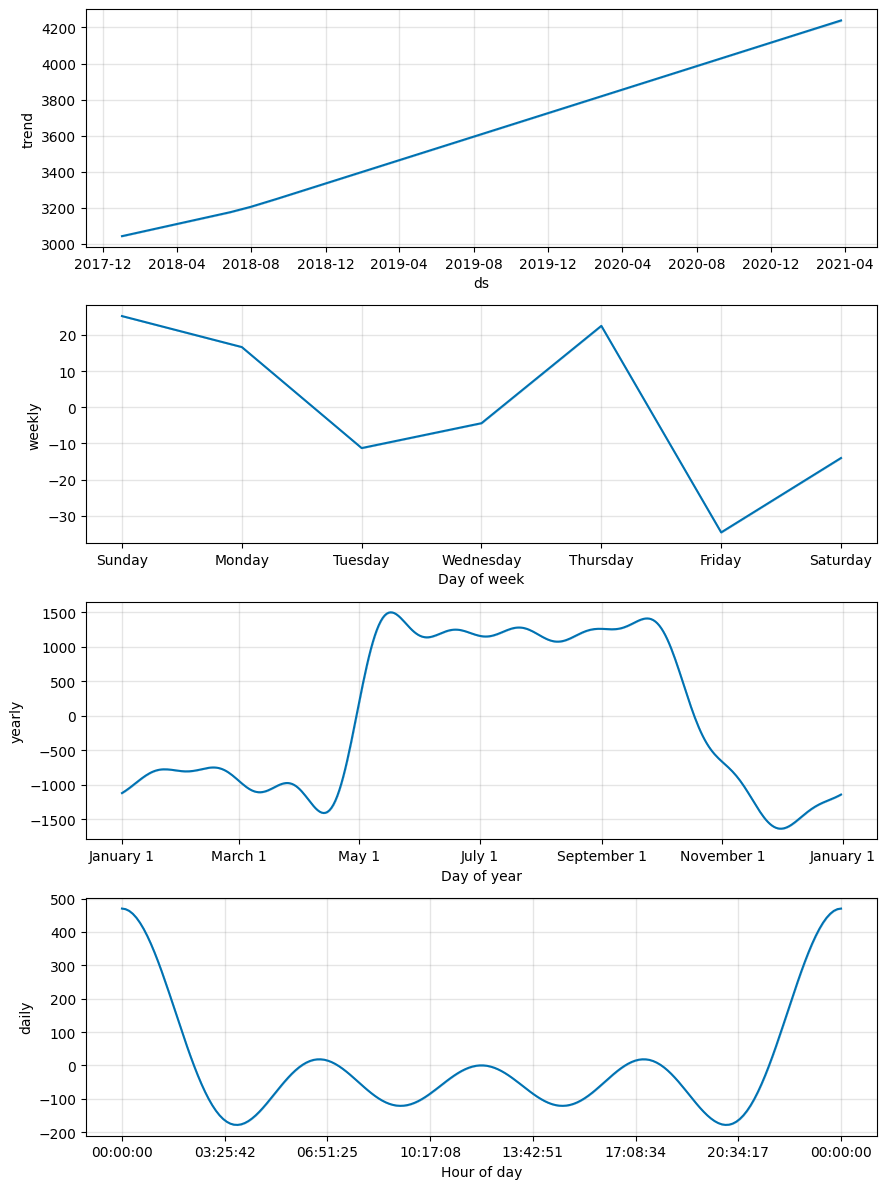

In [6]:
plot1 = m.plot(forecast)

plt2 = m.plot_components(forecast)